In [16]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=60, verbose=1
    
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
1123/1123 [==============================] - 198s 177ms/step - loss: 1.1715 - acc: 0.5585 - val_loss: 1.0780 - val_acc: 0.6093
Epoch 2/60
1123/1123 [==============================] - 95s 85ms/step - loss: 0.6587 - acc: 0.7554 - val_loss: 0.7849 - val_acc: 0.7130
Epoch 3/60
1123/1123 [==============================] - 95s 85ms/step - loss: 0.4846 - acc: 0.8239 - val_loss: 0.6542 - val_acc: 0.7437
Epoch 4/60
1123/1123 [==============================] - 94s 84ms/step - loss: 0.3838 - acc: 0.8612 - val_loss: 0.7056 - val_acc: 0.7494
Epoch 5/60
1123/1123 [==============================] - 94s 83ms/step - loss: 0.3150 - acc: 0.8887 - val_loss: 0.3355 - val_acc: 0.8789
Epoch 6/60
1123/1123 [==============================] - 95s 84ms/step - loss: 0.2739 - acc: 0.9047 - val_loss: 0.3016 - val_acc: 0.8902
Epoch 7/60
1123/1123 [==============================] - 93s 83ms/step - loss: 0.2277 - a

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

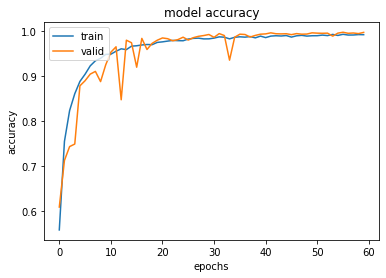

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

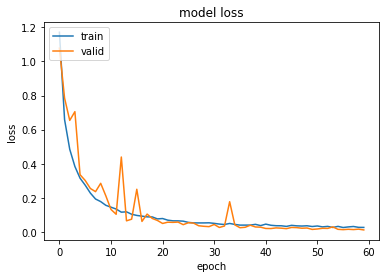

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_score, recall_score

Y_preds = model.predict(x_test)

Y_preds = np.argmax(Y_preds, axis=1)
Y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(np.round(Y_preds),Y_true)*100
cm = confusion_matrix(Y_true, np.round(Y_preds))
precision=precision_score(np.round(Y_preds),Y_true,average='weighted')*100
recall=recall_score(np.round(Y_preds),Y_true,average='weighted')*100
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
#precision = tp/(tp+fp)*100
#recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[509   0   0   0   0   0]
 [  1 701   0   0   1   0]
 [  1   0 609   0   0   0]
 [  0   0   0 387   0   0]
 [  0   3   0   0 291   0]
 [  0   0   0   1   0 493]]

============TEST METRICS=============
Accuracy: 99.76643309976645%
Precision: 99.7671413696634%
Recall: 99.76643309976645%
F1-score: 99.76678723345788

TRAIN METRIC ----------------------
Train acc: 99.25


In [21]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [ 'Commom rust','Bipolaris maydis','Curvularia lunata(wakker) boed spot','Northern leaf blight','Own spot','Sheath blight']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                                     precision    recall  f1-score   support

                        Commom rust       1.00      1.00      1.00       509
                   Bipolaris maydis       1.00      1.00      1.00       703
Curvularia lunata(wakker) boed spot       1.00      1.00      1.00       610
               Northern leaf blight       1.00      1.00      1.00       387
                           Own spot       1.00      0.99      0.99       294
                      Sheath blight       1.00      1.00      1.00       494

                           accuracy                           1.00      2997
                          macro avg       1.00      1.00      1.00      2997
                       weighted avg       1.00      1.00      1.00      2997



In [22]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2997/2997 [==============================] - 6s 2ms/step
Test Accuracy: 99.76643309976645


In [23]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

2997/2997 [==============================] - 6s 2ms/step
0.011450822664779656
0.9976643309976644


In [24]:
print(history.history['val_acc'])

[0.6092759426490522, 0.7130463797329345, 0.7437437437835199, 0.7494160827693042, 0.8788788788788788, 0.8902235568902236, 0.9049049049049049, 0.9109109109109109, 0.8882215549081096, 0.9255922589255923, 0.9536202869536203, 0.9656322989656323, 0.8478478478677359, 0.9803136469803136, 0.9746413079746413, 0.9202535869202536, 0.9843176509843177, 0.9596262929596263, 0.9733066399733067, 0.9803136469803136, 0.9853186519853186, 0.9836503169836504, 0.978978978978979, 0.9816483149816483, 0.986986986986987, 0.9806473139806473, 0.985985985985986, 0.988988988988989, 0.9906573239906573, 0.992992992992993, 0.9866533199866533, 0.994994994994995, 0.9906573239906573, 0.9359359359359359, 0.986986986986987, 0.9936603269936604, 0.992992992992993, 0.9873206539873206, 0.990990990990991, 0.9936603269936604, 0.9943276609943277, 0.9966633299966633, 0.9946613279946613, 0.9943276609943277, 0.9946613279946613, 0.9926593259926594, 0.994994994994995, 0.9936603269936604, 0.993993993993994, 0.9966633299966633, 0.99599599

In [25]:
print(history.history['val_loss'])

[1.0779594081339934, 0.784939940875874, 0.6542443763147723, 0.7055950935856676, 0.3354616227037993, 0.30161924982641714, 0.25459644028374384, 0.23602306251630092, 0.28495616943090357, 0.21121460462920058, 0.13143476573666474, 0.10325672354550412, 0.43927973366168777, 0.06477972900747885, 0.07443603144004297, 0.2500041043816254, 0.06134224297423015, 0.10423993990045882, 0.07875668008314259, 0.06693334847907444, 0.049356917410804294, 0.05673346115075938, 0.055808806382389234, 0.05741312096304359, 0.04226080597469053, 0.05367846697875605, 0.05154374109229264, 0.03580137460342924, 0.03264307775959642, 0.030718653842293765, 0.04335943175053108, 0.025935346054114138, 0.03438487594279414, 0.1769500730802704, 0.04112606225641706, 0.024332289823852146, 0.026877957145636622, 0.0390069692124186, 0.02869862307516114, 0.02759403115352675, 0.01992274696447628, 0.019454301744240537, 0.02328562588762921, 0.0216691149708465, 0.018831444313216886, 0.02592582790617103, 0.024935955368766066, 0.02134799510

In [26]:
print(history.history['acc'])

[0.5584502338142072, 0.7553996882521478, 0.8238699621465152, 0.8612781117923858, 0.888666221331552, 0.9046982854598085, 0.9232910264841673, 0.9345357381296806, 0.9399910932977065, 0.9487864618125139, 0.9492317969271877, 0.9558004898553542, 0.9611445112447117, 0.9593631707860165, 0.9670452015141394, 0.9679358717434869, 0.9697172121889102, 0.9707192162101982, 0.9703852148609208, 0.975395234901001, 0.9766199064796259, 0.9782899131596526, 0.979848586047739, 0.9792919171676687, 0.9790692495970598, 0.982854598071787, 0.9844132709731452, 0.9848586061010911, 0.9831885994210644, 0.9832999331997327, 0.9849699398797596, 0.9877532843464707, 0.9869739478957916, 0.9832999331997327, 0.9867512803384547, 0.9878646181251391, 0.9870852816744601, 0.9884212870052094, 0.9855266087731017, 0.9894232910264974, 0.986083277666444, 0.9894232910264974, 0.9902026274904486, 0.9896459585838343, 0.9906479625918504, 0.9871966154531285, 0.9900912936985081, 0.9910932977065242, 0.9894232910264974, 0.9902048085485308, 0.99

In [27]:
print(history.history['loss'])

[1.1715988400677375, 0.6586696694739225, 0.48462994017106764, 0.3838091637848799, 0.31498050376228726, 0.27399521310274755, 0.22760055787559408, 0.19289045266730764, 0.1776148952561155, 0.15581702852492688, 0.144836339817439, 0.13394906751484267, 0.11560130747681327, 0.11760563013896402, 0.1033972119477017, 0.09647822904445529, 0.09235781536109296, 0.0880097014743663, 0.08765594385416262, 0.07607802701237826, 0.07829458086883707, 0.068762992791362, 0.06482450568505616, 0.06463819420890249, 0.06279206304791034, 0.05561469127086688, 0.05269711910795932, 0.05246525105590331, 0.05253065042578238, 0.05316936992485415, 0.04990570544863177, 0.045757938768424135, 0.04316777557419795, 0.04943444473025862, 0.04370067626878089, 0.03963155302289497, 0.03968245229059409, 0.03977285012731327, 0.04414049192691579, 0.03676927221928249, 0.045434018271401616, 0.038731156498152994, 0.036140324044262914, 0.03575076891859891, 0.03211356147407674, 0.03827278516920346, 0.03541099735394614, 0.0341510564033529

In [28]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred, axis = 1)
y_pred

2997/2997 [==============================] - 6s 2ms/step


array([0, 5, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[509   0   0   0   0   0]
 [  1 701   0   0   1   0]
 [  1   0 609   0   0   0]
 [  0   0   0 387   0   0]
 [  0   3   0   0 291   0]
 [  0   0   0   1   0 493]]


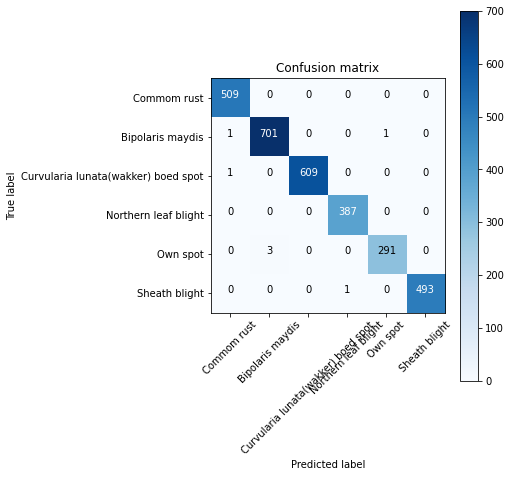

In [30]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

In [31]:
import tensorflow as tf
import tensorflow.keras.backend as K

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)
 
    return flops.total_float_ops

if __name__ == "__main__":
    x = K.random_normal(shape=(1, 1, 100, 256))
    model = ShuffleNet_V2(x.shape)
    print('FLOPs of tensorflow 1.12.0:', get_flops(model))


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPs of tensorflow 1.12.0: 7112350
